In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
import pathlib

import dask.array as da
import tifffile
import ome_types
import vizarr
import zarr
import requests
import io


import brick


def read_image_from_url(url):
    resp = requests.get(url)
    # Check that request succeeded
    return tiff.imread(io.BytesIO(resp.content))

file = "PATH_TO.ome.tiff"

store = tifffile.imread(file, aszarr=True)
#store = read_image_from_url(onlineFile);
ome_xml = ome_types.from_tiff(file)
channel_names = [c.name for c in ome_xml.images[0].pixels.channels]
channel_names

[None]

In [4]:
ome_xml.images[0].pixels.channels

[Channel(
    id='Channel:0:0',
    light_path={},
    samples_per_pixel=1,
 )]

In [5]:
daskArray = da.from_zarr(store, component="4") # t=0, high-res
daskArray

dask.array<from-zarr, shape=(408, 761, 995), dtype=uint8, chunksize=(1, 761, 995), chunktype=numpy.ndarray>

In [6]:
from skimage import measure
import numpy as np
from skimage.draw import ellipsoid
import pyvista as pv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

data = daskArray[:,:,:].compute()

level = 1.0 #Value of your data

data[data < level] = 0.0
data[data > level] = 0.0
data[data == level] = 1.0


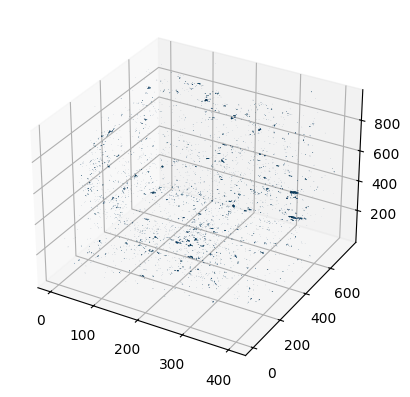

In [8]:
v2, f2, n2, values2 = measure.marching_cubes(volume = data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(v2[:, 0], v2[:,1], f2, v2[:, 2],
                linewidth=0.2, antialiased=True)
plt.show()

## Save as Mesh
f2=f2+1

#objOutput = input("Please enter name for 'obj' file(without .obj extension):  ")
newObj = open('segmentation.obj', 'w')
for item in v2:
    newObj.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in n2:
    newObj.write("vn {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in f2:
    newObj.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  

newObj.close()
